In [1]:
import matplotlib.pyplot as plt
import numpy as np

import time

import sys
import os

from datetime import datetime
import subprocess

from os.path import exists

import read_config_utils as cu

import matplotlib as mpl

In [2]:
#input_dir = 'output-files-bootstrap-test7-2d'

#input_dir = 'output-files-bootstrap-test6b-2d-2a-100k'

#input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-v1b'

#input_dir = 'output-files-bootstrap-test6b-2d-2a'




#input_dir = 'bootstrap-toy-study6b-2d-4c'

#input_dir = 'bootstrap-simple-pdf-toy-study6b-2d-4c'



#input_dir = 'freshtoys-simple-pdf-toy-study6b-2d-4c'

#input_dir = 'freshtoys-toy-study6b-2d-4c'



#input_dir = 'freshtoys-toy-study6b-2d-4c-save-model'

#input_dir = 'freshtoys-toy-study6b-2d-4c-save-model/freshmc-01'
#input_dir = 'freshtoys-toy-study6b-2d-4c-save-model/freshmc-02'




#input_dir = 'bootstrap-toy-study6b-1d-1a'
#input_dir = 'bootstrap-toy-study6b-1d-1a-badres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-goodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-verygoodres'
#input_dir = 'bootstrap-toy-study6b-1d-1a-perfect'

#input_dir = 'bootstrap-toy-study6b-1d-1a-nb1000'


#input_dir = 'simple-pdf-toy-study6b-1d-1a-1k'



#input_dir = 'fit-pdf-toy-study-2d-1a'

#input_dir = 'fit-pdf-toy-study-1d-1a'

#input_dir = 'hist-pdf-toy-study-1d-1b'

#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution-5k-toys'


#input_dir = 'bootstrap-toy-study8a-1d-1c'

#input_dir = 'hist-pdf-toy-study-1d-1a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-1a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-1a-badres'



#input_dir = 'bootstrap-toy-study8a-1d-1d'

#input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'

#input_dir = 'bootstrap-toy-study8a-1d-1d-nominal-resolution'

#-----



#input_dir = 'hist-pdf-toy-study-1d-1a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-1a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-1a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-1b-mediumbad'


#input_dir = 'bootstrap-toy-study8a-1d-1d-perfect'
#input_dir = 'bootstrap-toy-study8a-1d-1d'
#input_dir = 'bootstrap-toy-study8a-1d-1d-nominal-resolution'
#input_dir = 'bootstrap-toy-study8a-1d-1d-gpu0'



#----

#input_dir = 'bootstrap-toy-study8a-1d-2a-perfect'
#input_dir = 'bootstrap-toy-study8a-1d-2a-goodres'
#input_dir = 'bootstrap-toy-study8a-1d-2a-nominal-resolution'
#input_dir = 'bootstrap-toy-study8a-1d-2a-mediumbad'

#input_dir = 'hist-pdf-toy-study-1d-2a-perfect'
#input_dir = 'hist-pdf-toy-study-1d-2a-goodres'
#input_dir = 'hist-pdf-toy-study-1d-2a-nominal-resolution'
#input_dir = 'hist-pdf-toy-study-1d-2a-mediumbad'

#----


#input_dir = 'hist-pdf-toy-study-1d-2a'

#input_dir = 'bootstrap-toy-study8a-1d-2a'




input_dir = 'hist-pdf-toy-study-1d-2a-discretized-data'



with open( '%s/train-and-true-samples.npy' % input_dir, 'rb') as f :
    train_pts = np.load(f)
    train_det_pts = np.load(f)
    true_pts = np.load(f)
    true_det_pts = np.load(f)
    
print('\n\n')
print(' shape of train_pts:  %s' % str(train_pts.shape))
print(' shape of true_pts:   %s' % str(true_pts.shape))
print('\n\n')






 shape of train_pts:  (100000, 1)
 shape of true_pts:   (10000, 1)





In [3]:
config_file = '%s/config.txt' % (input_dir)

if not exists(config_file) :
    
    print("\n\n\n ******* Input file does not exist: %s\n\n\n" % config_file )
    sys.exit()
    

In [4]:
ndim = int(cu.get_par( config_file, "ndim"))
print("\n\n Number of feature dimensions: %d\n\n" % ndim)



 Number of feature dimensions: 1




In [5]:
with open( '%s/config-pars.npy' % input_dir, 'rb') as f :
    train_mu = np.load(f, allow_pickle=True )
    train_rho = np.load(f, allow_pickle=True)
    train_sig = np.load(f, allow_pickle=True)    
    true_mu = np.load(f, allow_pickle=True )
    true_rho = np.load(f, allow_pickle=True)
    true_sig = np.load(f, allow_pickle=True)  
    resolution = np.load(f, allow_pickle=True)

<function matplotlib.pyplot.show(close=None, block=None)>

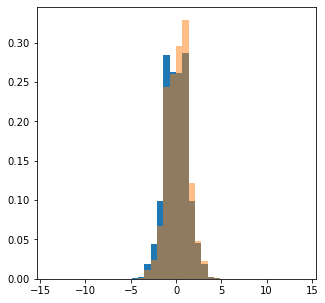

In [6]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))



hmin=-5
hmax=5


hmin=-14
hmax=14

hbins=40


for i in range(ndim) :
    if ndim > 1 :
        thisax = ax[i]
    else :
        thisax = ax
    thisax.hist( train_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True )
    thisax.hist( true_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True, alpha=0.5 )
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

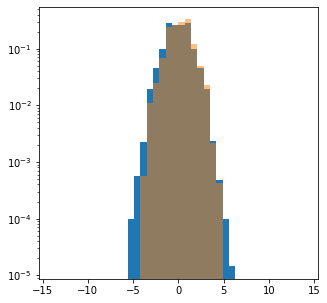

In [7]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))

hbins=40


for i in range(ndim) :
    if ndim > 1 :
        thisax = ax[i]
    else :
        thisax = ax
    thisax.hist( train_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True )
    thisax.hist( true_det_pts[:,i],bins=hbins, range=[hmin,hmax], density=True, alpha=0.5 )
    thisax.set_yscale('log')
    
plt.show

In [8]:
with open( "%s/omnifold-output-weights.npy" % input_dir,'rb') as f :
    main_sample_omnifold_weights = np.load(f)


In [9]:
main_sample_omnifold_weights = np.clip( main_sample_omnifold_weights, 1e-11, 1e11)

<function matplotlib.pyplot.show(close=None, block=None)>

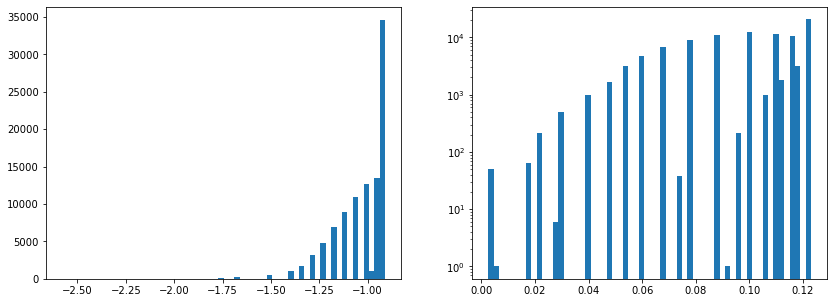

In [10]:
fig,ax = plt.subplots( 1, 2, figsize=(2*7,5))

hbins = 60
ax[0].hist( np.log10(main_sample_omnifold_weights), bins=hbins)
ax[1].hist( main_sample_omnifold_weights, bins=hbins)
ax[1].set_yscale('log')
plt.show

In [11]:
true_rho

array([[0.]])

In [12]:
true_mu.shape

(1,)

In [13]:
true_cov = np.zeros( shape=(ndim,ndim) )

for i in range(ndim) :
    for j in range(ndim) :
        k = ndim - j - 1
        if i == j :
            true_cov[i][j] = true_sig[i]*true_sig[i]
        elif j > i :
            print(" %d, %d, %d" % (i,j,k))
            true_cov[i][j] = true_rho[i][k] * true_sig[i] * true_sig[j]

In [14]:
true_cov

array([[0.81]])

In [15]:
have_fits = False

if exists( "%s/fit-results.npy" % input_dir ) :
    have_fits = True
    print("\n\n Have fit results file.\n\n")



 Have fit results file.




In [16]:
if have_fits :
    
    with open( '%s/fit-results.npy' % input_dir, 'rb' ) as f :
        fit_results_mean_val = np.load(f, allow_pickle=True )
        fit_results_mean_err = np.load(f, allow_pickle=True )
        fit_results_cov_val = np.load(f, allow_pickle=True )
        fit_results_cov_err = np.load(f, allow_pickle=True )        
        

    ave_fit_err_mean = np.zeros( ndim )
    
    ave_fit_err_cov = np.zeros( shape=(ndim,ndim) )

    for fi in range(ndim) :
    
        ave_fit_err_mean[fi] = np.mean( fit_results_mean_err[fi,:])
        
        print( '%d : ave fit error, mean :  %8.4f' % (fi, ave_fit_err_mean[fi]))
        
    for fi1 in range(ndim) :
        for fi2 in range(fi1,ndim) :
            
            
            ave_fit_err_cov[fi1,fi2] = np.mean( fit_results_cov_err[fi1,fi2,:])
            
            print( 'fi1, fi2 : %d, %d    ave fit error, cov : %8.4f' % (fi1,fi2, ave_fit_err_cov[fi1,fi2]))
    

0 : ave fit error, mean :    0.0091
fi1, fi2 : 0, 0    ave fit error, cov :   0.0118


In [17]:
def calc_mean( weights, fi ) :
    
    mean = ( np.sum( weights * train_pts[:,fi]) ) / ( np.sum( weights ) )
    
    return mean

In [18]:
def calc_rms( weights, fi ) :
    
    x = calc_mean( weights, fi )
    xx = ( np.sum( weights * train_pts[:,fi] * train_pts[:,fi] ) ) / ( np.sum( weights ) )
    
    #print(" x = %f,  xx = %f" % (x, xx))
    
    return np.sqrt(xx - x*x)


In [19]:
def calc_cov( weights, fi1, fi2 ) :
    
    x1 = calc_mean( weights, fi1 )
    x2 = calc_mean( weights, fi2 )
    x1x2 = ( np.sum( weights * train_pts[:,fi1] * train_pts[:,fi2] ) ) / ( np.sum( weights ) )
    
    return np.sqrt( x1x2 - x1*x2 )
    

In [20]:
def calc_mean_cov( weights, fi1, fi2 ) :

    return_dict = {}
    
    wsum = np.sum( weights )
    
    wx1 = np.sum( weights * train_pts[:,fi1] )
    wx2 = np.sum( weights * train_pts[:,fi2] )
    wx1x2 = np.sum( weights * train_pts[:,fi1] * train_pts[:,fi2] )

    x1 = wx1 / wsum
    x2 = wx2 / wsum

    x1x2 = wx1x2 / wsum
    
    cov12 = x1x2 - x1*x2

    
    return_dict["mean_x1"] = x1
    return_dict["mean_x2"] = x2
    return_dict["cov_x1x2"] = cov12    
    
    if fi1 != fi2 :
        wx1x1 = np.sum( weights * train_pts[:,fi1] * train_pts[:,fi1] )
        wx2x2 = np.sum( weights * train_pts[:,fi2] * train_pts[:,fi2] )
        cov11 = wx1x1 / wsum - x1*x1
        cov22 = wx2x2 / wsum - x2*x2

        rms1 = np.sqrt(cov11)
        rms2 = np.sqrt(cov22)
        rho12 = cov12 / (rms1*rms2)     
    
        return_dict["rho12"] = rho12
        return_dict["rms1"] = rms1
        return_dict["rms2"] = rms2
    else :
        rms1 = np.sqrt(cov12)
        return_dict["rms1"] = rms1
        
    return return_dict


    

In [21]:
n_samples = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        n_samples = n_samples + 1
        
print("\n\n Found %d bootstrap samples.\n\n" % n_samples )



 Found 500 bootstrap samples.




In [22]:
%%time

all_mean = np.zeros( shape=(ndim,n_samples) )
all_rms = np.zeros( shape=(ndim,n_samples) )
all_cov = np.zeros( shape=(ndim,ndim,n_samples) )
all_rho = np.zeros( shape=(ndim,ndim,n_samples) )

all_weight_min = np.zeros( n_samples )
all_weight_max = np.zeros( n_samples )


si = 0

for fi in range(5000) :
    
    fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, fi)
    
    if exists(fname) :
        
        print('\n----- %s exists' % fname )
        
        with open(fname,'rb') as f :
            
            final_push_weights_scaled = np.load(f)
            print( len(final_push_weights_scaled))
            print( final_push_weights_scaled )
            print( true_pts[:,0])
            
            all_weight_min[si] = np.min( final_push_weights_scaled )
            all_weight_max[si] = np.max( final_push_weights_scaled )
            
            for fi1 in range(ndim) :
                for fi2 in range(fi1,ndim) :
                    mean_cov = calc_mean_cov( final_push_weights_scaled, fi1, fi2 )
                    all_cov[fi1,fi2,si] = mean_cov["cov_x1x2"]
                    all_cov[fi2,fi1,si] = mean_cov["cov_x1x2"]
                    if ( fi1 == fi2 ) :
                        print( "  %d %d  :  mean = %8.4f, RMS = %8.4f, cov = %8.4f" % 
                              (fi1, fi2, mean_cov["mean_x1"], mean_cov["rms1"], mean_cov["cov_x1x2"]))
                        all_mean[fi1,si] = mean_cov["mean_x1"]
                        all_rms[fi1,si] = mean_cov["rms1"]
                    else :
                        print( "  %d %d  :  rho = %8.4f,  cov = %8.4f" %
                              (fi1, fi2, mean_cov["rho12"], mean_cov["cov_x1x2"]) )
                        all_rho[fi1,fi2,si] = mean_cov["rho12"]
                        all_rho[fi2,fi1,si] = mean_cov["rho12"]
                        
        si = si + 1
        
            


----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-000.npy exists
100000
[0.10237461 0.10616649 0.11241384 ... 0.11103878 0.11103878 0.10616649]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0600, RMS =   0.9049, cov =   0.8189

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-001.npy exists
100000
[0.10231876 0.10668228 0.11035327 ... 0.10981113 0.10981113 0.10668228]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0570, RMS =   0.9064, cov =   0.8216

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-002.npy exists
100000
[0.10739921 0.10467556 0.11352426 ... 0.11012492 0.11012492 0.10467556]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0820, RMS =   0.8857, cov =   0.7846

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-003.npy exists
100000
[0.10466731 0.10380963 0.11092934 ... 0.10826541 0.10826541 0.10380963]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean

  0 0  :  mean =   0.0532, RMS =   0.8998, cov =   0.8097

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-154.npy exists
100000
[0.10386371 0.10229882 0.11024703 ... 0.10748808 0.10748808 0.10229882]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0623, RMS =   0.9300, cov =   0.8649

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-155.npy exists
100000
[0.10852115 0.1010421  0.110411   ... 0.10687696 0.10687696 0.1010421 ]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0957, RMS =   0.9119, cov =   0.8316

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-156.npy exists
100000
[0.10640222 0.10163291 0.11004846 ... 0.10684666 0.10684666 0.10163291]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0684, RMS =   0.9208, cov =   0.8478

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-157.npy exists
100000
[0.10491374 0.10317771 0.10907769 ... 0.10698836 0.10698836 0.10317771


----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-187.npy exists
100000
[0.1041111  0.10359862 0.11107149 ... 0.10866041 0.10866041 0.10359862]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0786, RMS =   0.9166, cov =   0.8402

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-188.npy exists
100000
[0.1057495  0.10394396 0.11018541 ... 0.10829749 0.10829749 0.10394396]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0889, RMS =   0.9123, cov =   0.8323

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-189.npy exists
100000
[0.10514614 0.10515247 0.11220392 ... 0.10976499 0.10976499 0.10515247]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0612, RMS =   0.8951, cov =   0.8012

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-190.npy exists
100000
[0.10375372 0.10507718 0.11230699 ... 0.11034035 0.11034035 0.10507718]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean

  0 0  :  mean =   0.0683, RMS =   0.9112, cov =   0.8303

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-344.npy exists
100000
[0.10503093 0.1040707  0.11194991 ... 0.1089704  0.1089704  0.1040707 ]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0567, RMS =   0.9023, cov =   0.8141

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-345.npy exists
100000
[0.10502977 0.10314991 0.10934924 ... 0.10737384 0.10737384 0.10314991]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0637, RMS =   0.9255, cov =   0.8565

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-346.npy exists
100000
[0.10624714 0.10327027 0.11105513 ... 0.10837201 0.10837201 0.10327027]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0804, RMS =   0.9115, cov =   0.8308

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-347.npy exists
100000
[0.10814836 0.10129756 0.10895647 ... 0.10589244 0.10589244 0.10129756

  0 0  :  mean =   0.0700, RMS =   0.9232, cov =   0.8523

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-377.npy exists
100000
[0.10544252 0.10389436 0.11112911 ... 0.10852443 0.10852443 0.10389436]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0615, RMS =   0.9075, cov =   0.8235

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-378.npy exists
100000
[0.10470446 0.10396562 0.10926615 ... 0.10765798 0.10765798 0.10396562]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0477, RMS =   0.9244, cov =   0.8545

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-379.npy exists
100000
[0.10686322 0.10176172 0.11066507 ... 0.10665566 0.10665566 0.10176172]
[ 1.05  2.85  0.15 ... -0.15  0.15  0.75]
  0 0  :  mean =   0.0597, RMS =   0.9085, cov =   0.8254

----- hist-pdf-toy-study-1d-2a-discretized-data/bootstrap-weights-380.npy exists
100000
[0.10488803 0.10303701 0.11427326 ... 0.11013677 0.11013677 0.10303701

In [23]:
all_mean

array([[0.06001384, 0.05701497, 0.08197688, 0.06855742, 0.06946534,
        0.07020869, 0.08010159, 0.07097006, 0.0846653 , 0.08567161,
        0.0844782 , 0.09227394, 0.08194546, 0.07812265, 0.08371422,
        0.06309385, 0.07420593, 0.06581211, 0.04383945, 0.08097586,
        0.06040381, 0.05939536, 0.06910026, 0.04796636, 0.05735499,
        0.08119237, 0.07213337, 0.06868098, 0.07323769, 0.07153604,
        0.09013177, 0.07130938, 0.0583619 , 0.07849534, 0.08370378,
        0.08195069, 0.07216558, 0.0510276 , 0.0841093 , 0.07325332,
        0.04928832, 0.07088071, 0.06431007, 0.10131539, 0.08774492,
        0.06149417, 0.07138244, 0.08800517, 0.07830783, 0.0856054 ,
        0.06069325, 0.05028955, 0.07305226, 0.06990128, 0.08127599,
        0.04932879, 0.05877127, 0.06707979, 0.07882347, 0.07818765,
        0.06012031, 0.06554148, 0.06208116, 0.09266616, 0.0525933 ,
        0.05246149, 0.05644507, 0.07384585, 0.05419321, 0.08089769,
        0.07706734, 0.04734225, 0.06469797, 0.07

<function matplotlib.pyplot.show(close=None, block=None)>

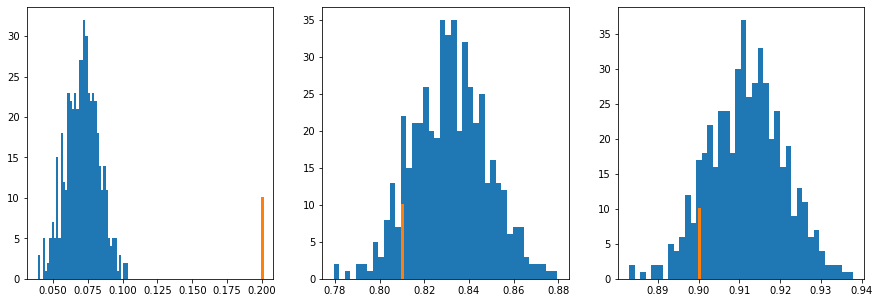

In [24]:
fig,ax = plt.subplots( ndim, 3, figsize=(3*5,ndim*5))

ymax = 10

for i in range(ndim) :
    
    if ndim > 1 :
        thisax = ax[i][0]
    else :
        thisax = ax[0]
    thisax.hist( all_mean[i], bins=40)
    thisax.plot( (true_mu[i], true_mu[i]), (0,ymax), linewidth=3 )
    
    if ndim > 1 :
        thisax = ax[i][1]
    else :
        thisax = ax[1]    
    thisax.hist( all_cov[i][i], bins=40)
    thisax.plot( (true_cov[i][i], true_cov[i][i]), (0,ymax), linewidth=3 )


    
    if ndim > 1 :
        thisax = ax[i][2]
    else :
        thisax = ax[2]    
    thisax.hist( all_rms[i], bins=40)
    thisax.plot( (true_sig[i], true_sig[i]), (0,ymax), linewidth=3 )    
    
    
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

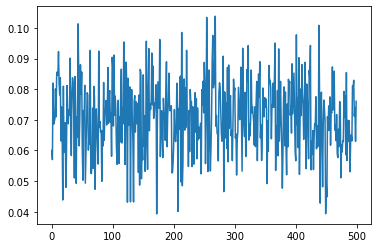

In [25]:
plt.plot(all_mean[0])
plt.show

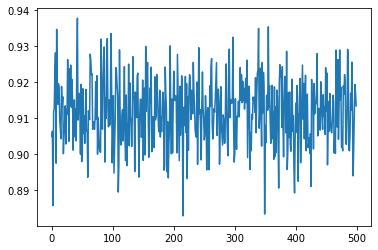

In [26]:
plt.plot(all_rms[0])

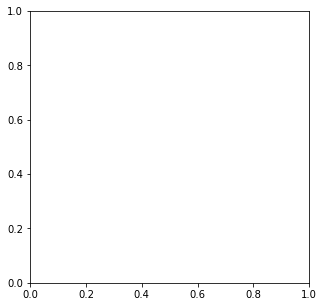

In [27]:
fig,ax = plt.subplots( ndim, ndim, figsize=(ndim*5,ndim*5))

ymax = 10

if ndim > 1 :

    for i in range(0,ndim-1) :

        for j in range(i+1,ndim) :

            k = ndim - j - 1

            ax[i][j].hist( all_rho[i,j], bins=40)

            ax[i][j].plot( (true_rho[i][k], true_rho[i][k]), (0, ymax), linewidth=3 )



    plt.show

In [28]:
print('\n')

ave_mean = np.zeros( ndim )
rms_mean = np.zeros( ndim )
rms_mean_err = np.zeros( ndim )

ave_cov = np.zeros( shape=(ndim,ndim) )
rms_cov = np.zeros( shape=(ndim,ndim) )
rms_cov_err = np.zeros( shape=(ndim,ndim) )


for fi in range(ndim) :
    
    ave_mean[fi] = np.mean( all_mean[fi] )
    ave_mean2 = np.mean( all_mean[fi]*all_mean[fi])
    rms_mean[fi] = np.sqrt( ave_mean2 - ave_mean[fi]*ave_mean[fi] )
    rms_mean_err[fi] = rms_mean[fi] / np.sqrt(2*n_samples)
    print("  feature %d  :  mean   ave %8.4f  (true %8.4f), rms %8.5f +/- %6.5f" % 
          (fi, ave_mean[fi], true_mu[fi], rms_mean[fi], rms_mean_err[fi] ))
    
print('\n')

for fi in range(ndim) :
    
    ave_rms = np.mean( all_rms[fi] )
    ave_rms2 = np.mean( all_rms[fi]*all_rms[fi])
    rms_rms = np.sqrt( ave_rms2 - ave_rms*ave_rms )
    print("  feature %d  :  RMS    ave %8.4f  (true %8.4f), rms %8.4f" % (fi, ave_rms, true_sig[fi], rms_rms ))
    
print('\n')

for fi1 in range(0,ndim-1) :
    for fi2 in range(fi1+1, ndim) :
        k = ndim - fi2 - 1
        ave_rho = np.mean( all_rho[fi1,fi2])
        ave_rho2 = np.mean( all_rho[fi1,fi2]*all_rho[fi1,fi2] )
        rms_rho = np.sqrt( ave_rho2 - ave_rho*ave_rho )
        print("  feature %d, %d  :  rho    ave %8.4f  (true %8.4f), rms %8.4f" % ( fi1, fi2, ave_rho, true_rho[fi1][k], rms_rho ))
        
print("\n")

for fi1 in range(0,ndim) :
    for fi2 in range(fi1,ndim) :
        ave_cov[fi1,fi2] = np.mean( all_cov[fi1][fi2] )
        ave_cov2 = np.mean( all_cov[fi1][fi2]*all_cov[fi1][fi2] )
        rms_cov[fi1,fi2] = np.sqrt( ave_cov2 - ave_cov[fi1,fi2]*ave_cov[fi1,fi2] )
        rms_cov_err[fi1,fi2] = rms_cov[fi1,fi2]/np.sqrt(2*n_samples)
        print("  feature %d, %d  :  cov    ave %8.4f  (true %8.4f), rms %8.5f +/- %6.5f" %
              (fi1, fi2, ave_cov[fi1,fi2], true_cov[fi1,fi2], rms_cov[fi1,fi2], rms_cov_err[fi1,fi2] ) )

print("\n")



  feature 0  :  mean   ave   0.0710  (true   0.2000), rms  0.01181 +/- 0.00037


  feature 0  :  RMS    ave   0.9118  (true   0.9000), rms   0.0092




  feature 0, 0  :  cov    ave   0.8314  (true   0.8100), rms  0.01675 +/- 0.00053




## Save the simple direct calculation results for setting fit parameter ranges from RMS.

In [29]:
with open( '%s/simple-calc-results.npy' % input_dir, 'wb' ) as f :
    np.save( f, ave_mean )
    np.save( f, rms_mean )
    np.save( f, ave_cov )
    np.save( f, rms_cov )

In [30]:
all_mean.shape

(1, 500)

In [31]:
fit_results_mean_val.shape

(1, 50)

In [32]:
n_for_plot = 0

n_boot = len(all_mean[0])
n_fit  = len(fit_results_mean_val[0])

if n_boot > n_fit :
    n_for_plot = n_fit
else :
    n_for_plot = n_boot

print('  n_boot = %d,   n_fit = %d,   n_for_plot = %d' % (n_boot, n_fit, n_for_plot))



  n_boot = 500,   n_fit = 50,   n_for_plot = 50


   0 : x axis limits:  0.041, 0.104    y axis limits  0.041, 0.104


<function matplotlib.pyplot.show(close=None, block=None)>

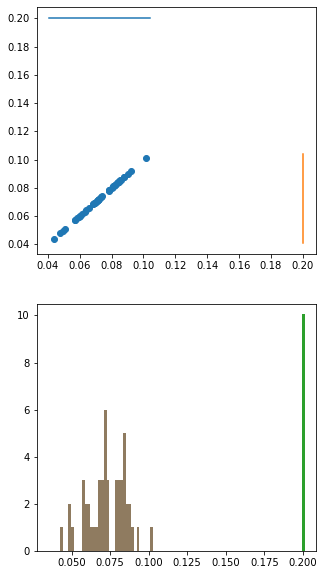

In [33]:
fig,ax = plt.subplots( 2, ndim, figsize=(5*ndim,5*2))

hbins=40
hmax = 10

for fi in range(ndim) :
    
    
    if ndim > 1 :
        thisax = ax[0][fi]
    else :
        thisax = ax[0]
        
    thisax.scatter( all_mean[fi,:n_for_plot], fit_results_mean_val[fi,:n_for_plot])
    xlow, xhigh = thisax.get_xlim()
    ylow, yhigh = thisax.get_ylim()
    print("  %2d : x axis limits:  %.3f, %.3f    y axis limits  %.3f, %.3f" % 
              (fi, xlow, xhigh, ylow, yhigh))
    thisax.plot( (xlow, xhigh), (true_mu[fi], true_mu[fi]))
    thisax.plot( (true_mu[fi], true_mu[fi]), (ylow, yhigh))
    

    if ndim > 1 :
        thisax = ax[1][fi]
    else :
        thisax = ax[1]
    
    
    thisax.hist( fit_results_mean_val[fi,:n_for_plot], bins=hbins, 
                   range=[ave_mean[fi]-3*rms_mean[fi], ave_mean[fi]+3*rms_mean[fi]])
    thisax.hist( all_mean[fi,:n_for_plot], bins=hbins, alpha=0.5,
                   range=[ave_mean[fi]-3*rms_mean[fi], ave_mean[fi]+3*rms_mean[fi]])
    thisax.plot( (true_mu[fi],true_mu[fi]),(0,hmax), linewidth=3)
    

plt.show

In [34]:
if ndim > 1 :

    fig,ax = plt.subplots( ndim, ndim, figsize=(5*ndim,5*ndim))

    for fi1 in range(ndim) :
        for fi2 in range(fi1,ndim) :
            ax[fi1][fi2].scatter( all_cov[fi1,fi2,:], fit_results_cov_val[fi1,fi2,:])
            xlow, xhigh = ax[fi1][fi2].get_xlim()
            ylow, yhigh = ax[fi1][fi2].get_ylim()
            print("  %2d, %2d : x axis limits:  %.3f, %.3f    y axis limits  %.3f, %.3f" % 
                  (fi1, fi2, xlow, xhigh, ylow, yhigh))
            ax[fi1][fi2].plot((xlow,xhigh),(true_cov[fi1][fi2], true_cov[fi1][fi2]))
            ax[fi1][fi2].plot((true_cov[fi1][fi2], true_cov[fi1][fi2]),(ylow,yhigh))

    plt.show

In [35]:
if ndim > 1 :

    fig,ax = plt.subplots( ndim, ndim, figsize=(5*ndim,5*ndim))

    hbins=40
    hmax=10

    for fi1 in range(ndim) :
        for fi2 in range(fi1,ndim) :
            ax[fi1][fi2].hist( fit_results_cov_val[fi1,fi2,:], bins=hbins, 
                             range=[ave_cov[fi1,fi2]-3*rms_cov[fi1,fi2], ave_cov[fi1,fi2]+3*rms_cov[fi1][fi2]] )
            ax[fi1][fi2].hist( all_cov[fi1,fi2,:], bins=hbins, alpha=0.5,
                             range=[ave_cov[fi1,fi2]-3*rms_cov[fi1,fi2], ave_cov[fi1,fi2]+3*rms_cov[fi1][fi2]] )
            xlow, xhigh = ax[fi1][fi2].get_xlim()
            ylow, yhigh = ax[fi1][fi2].get_ylim()
            print("  %2d, %2d : x axis limits:  %.3f, %.3f    y axis limits  %.3f, %.3f" % 
                  (fi1, fi2, xlow, xhigh, ylow, yhigh))

            ax[fi1][fi2].plot((true_cov[fi1][fi2], true_cov[fi1][fi2]),(0,hmax), linewidth=3)

    plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

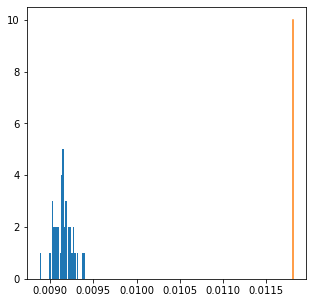

In [36]:
fig,ax = plt.subplots( 1, ndim, figsize=(5*ndim,5))

hbins = 40
hmax = 10

for fi in range(ndim) :
    if ndim > 1 :
        thisax = ax[fi]
    else :
        thisax = ax
        
    thisax.hist( fit_results_mean_err[fi,:], bins=hbins )
    thisax.plot( (rms_mean[fi], rms_mean[fi]), (0,hmax) )
    
    
plt.show

In [37]:
fit_results_mean_err

array([[0.00905983, 0.00907345, 0.00887705, 0.00913513, 0.00914499,
        0.00924585, 0.00931023, 0.00899034, 0.00938007, 0.00922517,
        0.00916737, 0.0092304 , 0.00920966, 0.00911882, 0.00909459,
        0.00905428, 0.00921169, 0.00914819, 0.00916009, 0.00902506,
        0.00906061, 0.00909141, 0.00915148, 0.00902752, 0.00913467,
        0.00913384, 0.0092848 , 0.00918732, 0.00905648, 0.00925684,
        0.00916677, 0.00926857, 0.00913785, 0.00923406, 0.00918069,
        0.00903351, 0.00913877, 0.00915548, 0.00907366, 0.00914551,
        0.0090385 , 0.00926778, 0.00939737, 0.00913575, 0.00915527,
        0.0091834 , 0.00915167, 0.00902846, 0.00921858, 0.00900468]])

<function matplotlib.pyplot.show(close=None, block=None)>

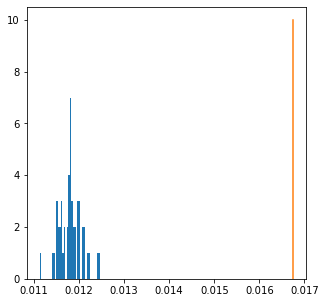

In [38]:
fig,ax = plt.subplots( 1, int((ndim*ndim+ndim)/2), figsize=(5*int((ndim*ndim+ndim)/2),5))

hbins = 40
hmax = 10

ai = 0

for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        
        if ndim > 1 :
            thisax = ax[ai]
        else :
            thisax = ax

        thisax.hist( fit_results_cov_err[fi1,fi2,:], bins=hbins )
        thisax.plot( (rms_cov[fi1,fi2], rms_cov[fi1,fi2]), (0,hmax) )
        ai = ai + 1
    
plt.show

## Bootstrap error compared with average fit error

In [39]:
print('\n')

for fi in range(ndim) :
    
    print("  mean %d:  rms bootstraps %8.4f,  ave fit err %8.4f    ratio %6.2f |  val. %6.3f, true %6.3f, diff %6.3f"
         % (fi, rms_mean[fi], ave_fit_err_mean[fi], rms_mean[fi] / ave_fit_err_mean[fi], ave_mean[fi], true_mu[fi], ave_mean[fi]-true_mu[fi] ))
    
print('\n')

for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        print("  cov%d%d:   rms bootstraps %8.4f,  ave fit err %8.4f    ratio %6.2f |  val. %6.3f, true %6.3f, diff %6.3f"
              % (fi1, fi2, rms_cov[fi1,fi2], ave_fit_err_cov[fi1,fi2], rms_cov[fi1,fi2]/ave_fit_err_cov[fi1,fi2], ave_cov[fi1,fi2], true_cov[fi1,fi2], ave_cov[fi1,fi2]-true_cov[fi1,fi2]) )
        

print('\n\n\n')

for fi in range(ndim) :
    
    print("  mean %d:  rms samples %8.5f +/- %6.5f,  ave fit err %8.5f    ratio %6.2f +/- %4.2f "
         % (fi, rms_mean[fi], rms_mean_err[fi],
            ave_fit_err_mean[fi], 
            rms_mean[fi] / ave_fit_err_mean[fi],
            rms_mean_err[fi] / ave_fit_err_mean[fi]))

for fi1 in range(ndim) :
    for fi2 in range(fi1,ndim) :
        print("  cov%d%d:   rms samples %8.5f +/- %6.5f,  ave fit err %8.5f    ratio %6.2f +/- %4.2f "
              % (fi1, fi2, rms_cov[fi1,fi2], rms_cov_err[fi1,fi2],
                 ave_fit_err_cov[fi1,fi2], 
                 rms_cov[fi1,fi2]/ave_fit_err_cov[fi1,fi2], rms_cov_err[fi1,fi2]/ave_fit_err_cov[fi1,fi2] ) )
        
print('\n')



  mean 0:  rms bootstraps   0.0118,  ave fit err   0.0091    ratio   1.29 |  val.  0.071, true  0.200, diff -0.129


  cov00:   rms bootstraps   0.0168,  ave fit err   0.0118    ratio   1.42 |  val.  0.831, true  0.810, diff  0.021




  mean 0:  rms samples  0.01181 +/- 0.00037,  ave fit err  0.00915    ratio   1.29 +/- 0.04 
  cov00:   rms samples  0.01675 +/- 0.00053,  ave fit err  0.01181    ratio   1.42 +/- 0.04 




## Look for outliers in feature coords and weights

In [40]:
for fi in range( ndim ) :
    
    print( "  feature %2d :  min %12f   max %12f " % ( fi, np.min(train_pts[:,fi]), np.max(train_pts[:,fi])) )

  feature  0 :  min    -4.050000   max     4.350000 


In [41]:
for si in range( n_samples ) :
    
    max_delta_mean = 0
    for fi in range(ndim) :
        delta = fit_results_mean_val[fi,si] - all_mean[fi,si] 
        if np.abs(delta) > max_delta_mean :
            max_delta_mean = delta
        
    print("  %3d : weight range  %12g  to %12f ,   max delta mean  %12f"
         % (si, all_weight_min[si], all_weight_max[si], max_delta_mean ))

    0 : weight range    0.00192255  to     0.127781 ,   max delta mean     -0.000003
    1 : weight range    0.00117195  to     0.110353 ,   max delta mean      0.000010
    2 : weight range     0.0162104  to     0.114375 ,   max delta mean      0.000011
    3 : weight range    0.00253174  to     0.111310 ,   max delta mean     -0.000001
    4 : weight range     0.0135235  to     0.110805 ,   max delta mean      0.000000
    5 : weight range    0.00648457  to     0.109503 ,   max delta mean      0.000000
    6 : weight range    0.00790578  to     0.112550 ,   max delta mean      0.000001
    7 : weight range   0.000984399  to     0.113300 ,   max delta mean     -0.000000
    8 : weight range    0.00279586  to     0.109941 ,   max delta mean      0.000002
    9 : weight range    0.00358739  to     0.111032 ,   max delta mean     -0.000001
   10 : weight range    0.00185836  to     0.112727 ,   max delta mean     -0.000002
   11 : weight range    0.00649326  to     0.417746 ,   max delta

IndexError: index 50 is out of bounds for axis 1 with size 50

## Look deeper into bootstrap with an outlier

In [ ]:
si = 35

fname = '%s/bootstrap-weights-%03d.npy' % (input_dir, si)
            
with open(fname,'rb') as f :
            
    final_push_weights_scaled = np.load(f)

In [ ]:
fig,ax = plt.subplots( 1, 2, figsize=(2*7,5))

hbins = 60
ax[0].hist( np.log10(final_push_weights_scaled), bins=hbins)
ax[1].hist( final_push_weights_scaled, bins=hbins)
ax[1].set_yscale('log')

plt.show

In [ ]:
selection_mask = final_push_weights_scaled < 100
train_pts_sel = train_pts[ selection_mask ]
weights_sel = final_push_weights_scaled[ selection_mask ]

print(" number of events before selection  %d" % len(train_pts))
print(" number of events passing selection %d" % len(train_pts_sel))
print(" max weight before selection : %f" % np.max(final_push_weights_scaled))
print(" max weight passing selection: %f" % np.max(weights_sel))

In [ ]:
for fi in range( ndim ) :
    
    fit_mean = fit_results_mean_val[fi,si]
    mean_all_evts = all_mean[fi,si]
    mean_sel = ( np.sum( weights_sel * train_pts_sel[:,fi]) ) / ( np.sum( weights_sel ) )
    mean_diff = mean_sel - mean_all_evts
    print(" %2d :  fit mean  %10f   mean all  %10f   selected  %10f   diff %10f  fit diff %10f" % 
          ( fi, fit_mean, mean_all_evts, mean_sel, mean_diff, (mean_sel-fit_mean) ))

## Look at outlier point

In [ ]:
train_pts_antisel = train_pts[ final_push_weights_scaled > 100 ]
train_pts_antisel.shape

In [ ]:
for fi in range( ndim ) :
    
    sigma = np.sqrt(ave_cov[fi,fi])
    
    print(" %2d :  val %10f   mean %10f   sigma %10f  diff/sigma %10f" %
          (fi, train_pts_antisel[0,fi], ave_mean[fi], sigma, (train_pts_antisel[0,fi]-ave_mean[fi])/sigma )
         )

In [ ]:
true_sig

## Calculate the true weights and compare with unfolding weights